In [1]:
!pip install yfinance
!pip install matplotlib
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

In [77]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
 

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [90]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.3)

    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(stock_data.Date),
        y=stock_data.Volume.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date), 
                             y=revenue_data.Volume.astype("float"),
                             name="Volume"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    fig.show()

In [79]:
tesla_data = yf.Ticker('TSLA')
tesla_data = tesla_data.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data['Date'] = tesla_data['Date'].dt.date
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [80]:
tesla_revenue = pd.DataFrame(columns=["Date", "Volume"])
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data  = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
tables = soup.find_all('table')
tables

soup = BeautifulSoup(data, "html.parser")
tesla_revenue = pd.DataFrame(columns=["Date", "Volume"])
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    volume = col[1].text.replace(',', '').replace('$', '')
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Volume":[volume]})], ignore_index=True)

tesla_revenue.tail()


,Date,Volume
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [95]:
gme_data = yf.Ticker('GME')
gme_data = gme_data.history(period="max")
gme_data.reset_index(inplace=True)
gme_data['Date'] = gme_data['Date'].dt.date
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [92]:
gme_revenue = pd.DataFrame(columns=["Date", "Volume"])
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
data  = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
tables = soup.find_all('table')
tables

soup = BeautifulSoup(data, "html.parser")
gme_revenue = pd.DataFrame(columns=["Date", "Volume"])
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    volume = col[1].text.replace(',', '').replace('$', '')
    gme_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Volume":[volume]})], ignore_index=True)

gme_revenue.tail()


,Date,Volume
9,2012,413
10,2011,204
11,2010,117
12,2009,112
13,2005,1843


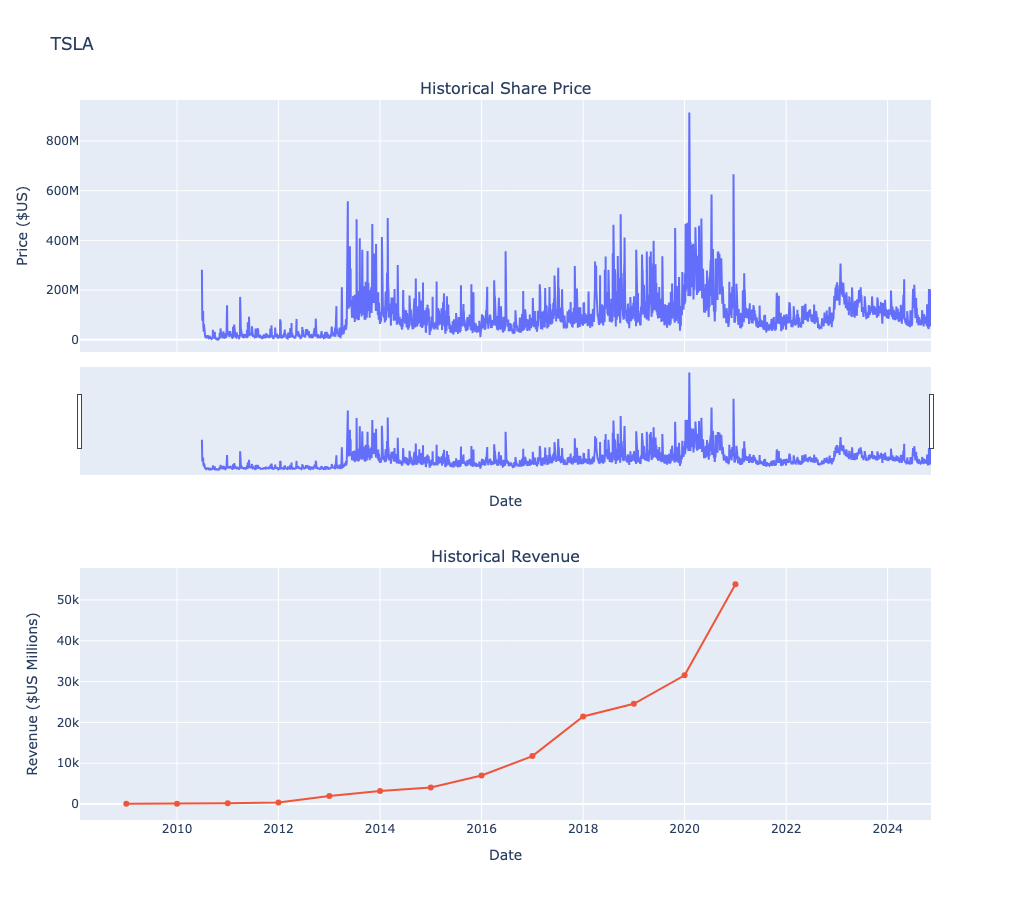

In [91]:
make_graph(tesla_data, tesla_revenue, 'TSLA')

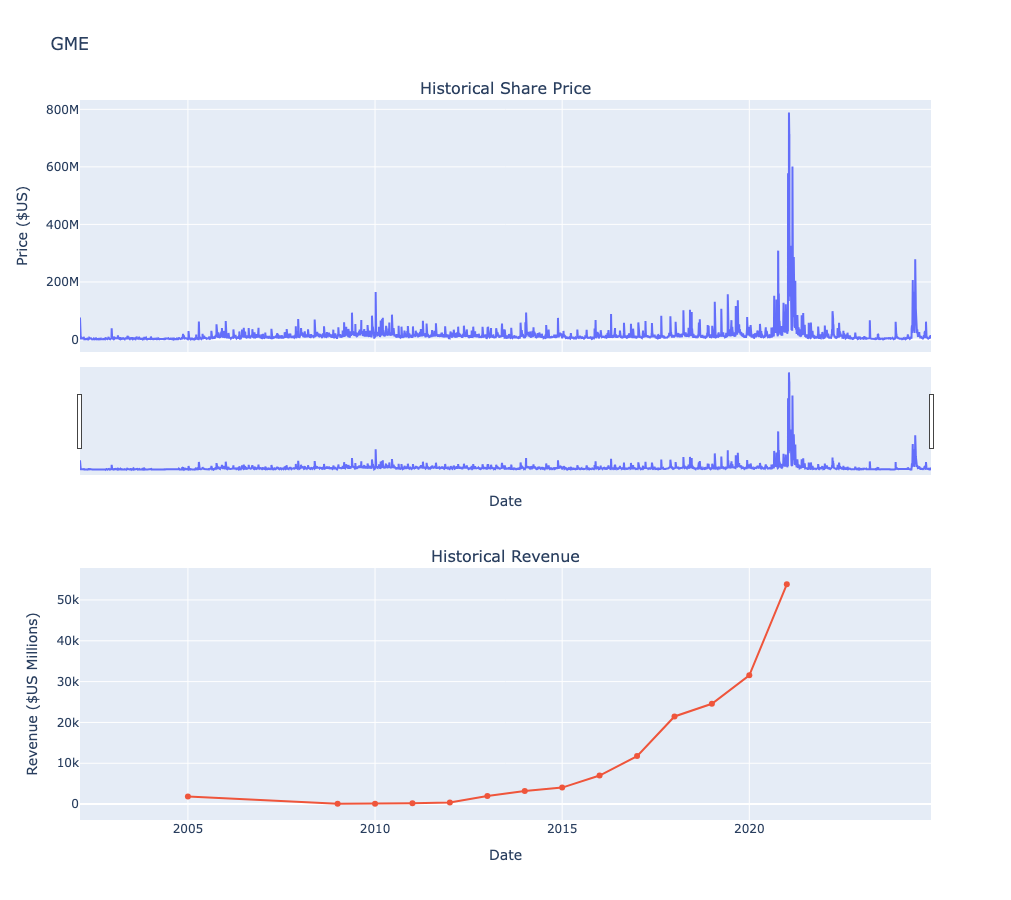

In [96]:
make_graph(gme_data, gme_revenue, 'GME')